<a href="https://colab.research.google.com/github/Niloofar-Esbati/6220Final-project/blob/main/diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Libraries**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [ ]:
# install slim version (default): if you get an error message, run it again one or more times:
!pip3 install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1


# Dataset

**Dataset**
Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)
Sources:
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231
(c) Date received: 9 May 1990
https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('diabetes.csv')
df.head(25)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   
20            3      126             88             41      235  39.3   
21            8       99             84              0        0  35.4   
22            7      196             90              0        0  39.8   
23            9      119             80             35        0  29.0   
24           11      143             94             33      146  36.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1  
20                     0.704   27        0  
21                     0.388   50        0  
22                     0.451   41        1  
23                     0.263   29        1  
24                     0.254   51        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


# Exploratory Data Analysis


## Plots

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

In [ ]:
df = df.rename(columns = {'Outcome':'class'})

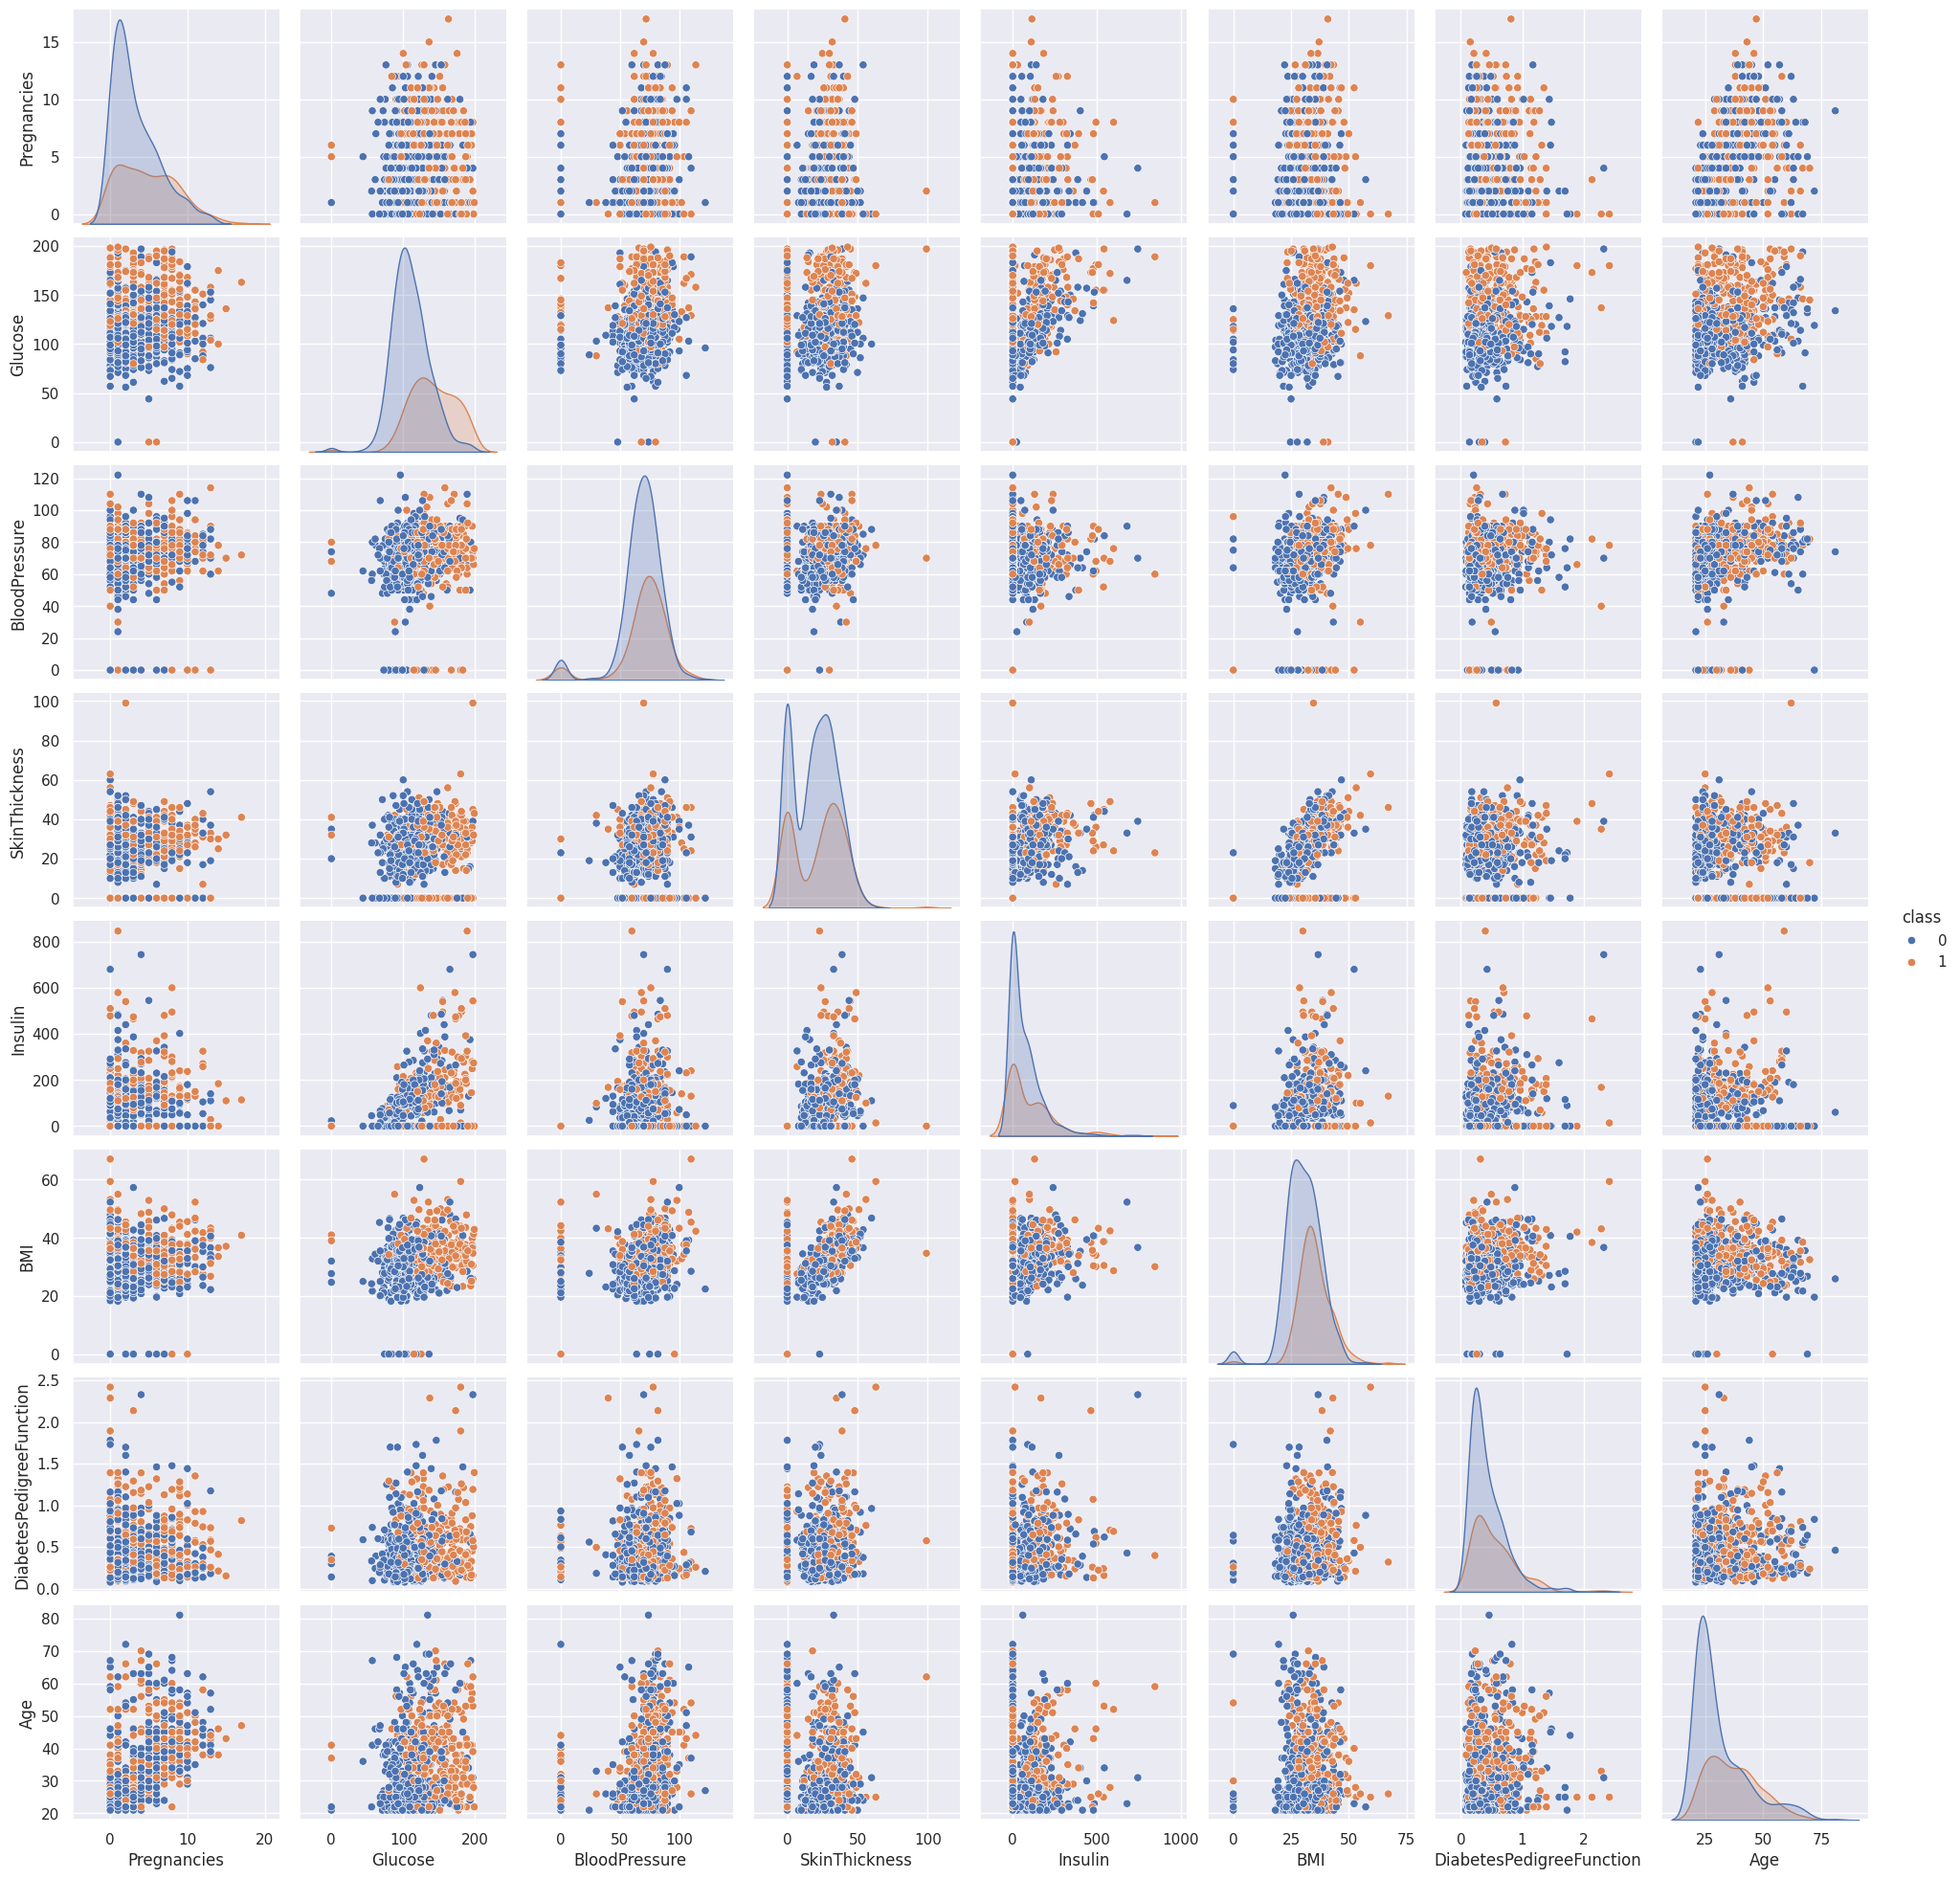

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

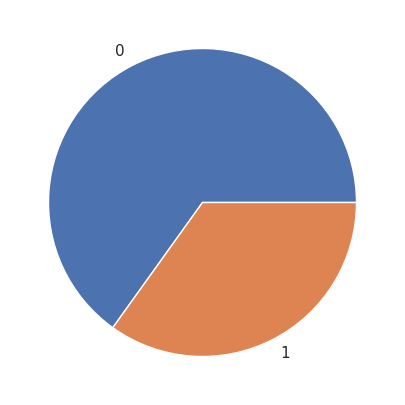

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
5                     0.201   30  
6                     0.248   26  
7                     0.134   29  
8                     0.158   53  
9                     0.232   54

In [ ]:
X.describe().transpose()

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
5     0.342981 -0.153185       0.253036      -1.288212 -0.692891 -0.811341   
6    -0.250952 -1.342476      -0.987710       0.719086  0.071204 -0.125977   
7     1.827813 -0.184482      -3.572597      -1.288212 -0.692891  0.419775   
8    -0.547919  2.381884       0.046245       1.534551  4.021922 -0.189437   
9     1.233880  0.128489       1.390387      -1.288212 -0.692891 -4.060474   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  
5                 -0.818079 -0.275760  
6                 -0.676133 -0.616111  
7                 -1.020427 -0.360847  
8                 -0.947944  1.681259  
9                 -0.724455  1.766346

In [ ]:
X.describe().transpose()

count          mean       std       min       25%  \
Pregnancies               768.0 -6.476301e-17  1.000652 -1.141852 -0.844885   
Glucose                   768.0 -9.251859e-18  1.000652 -3.783654 -0.685236   
BloodPressure             768.0  1.503427e-17  1.000652 -3.572597 -0.367337   
SkinThickness             768.0  1.006140e-16  1.000652 -1.288212 -1.288212   
Insulin                   768.0 -3.006854e-17  1.000652 -0.692891 -0.692891   
BMI                       768.0  2.590520e-16  1.000652 -4.060474 -0.595578   
DiabetesPedigreeFunction  768.0  2.451743e-16  1.000652 -1.189553 -0.688969   
Age                       768.0  1.931325e-16  1.000652 -1.041549 -0.786286   

                               50%       75%       max  
Pregnancies              -0.250952  0.639947  3.906578  
Glucose                  -0.121888  0.605771  2.444478  
BloodPressure             0.149641  0.563223  2.734528  
SkinThickness             0.154533  0.719086  4.921866  
Insulin                  -0.428062  0.412008  6.652839  
BMI                       0.000942  0.584771  4.455807  
DiabetesPedigreeFunction -0.300128  0.466227  5.883565  
Age                      -0.360847  0.660206  4.063716

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

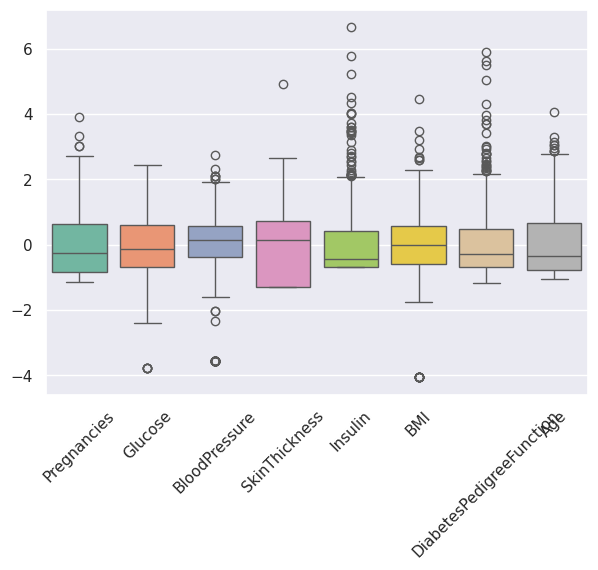

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

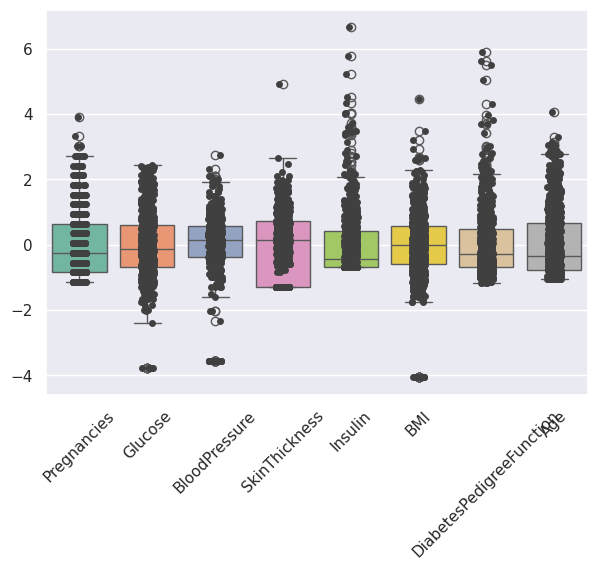

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

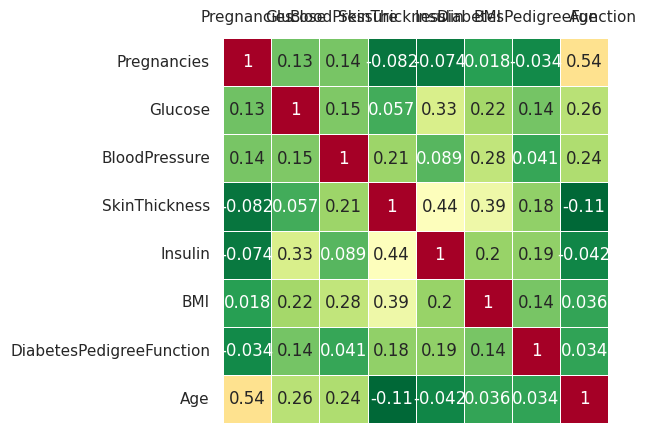

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

**Principal Component Analysis (PCA)**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

Text(0, 0.5, '$Z_2$')

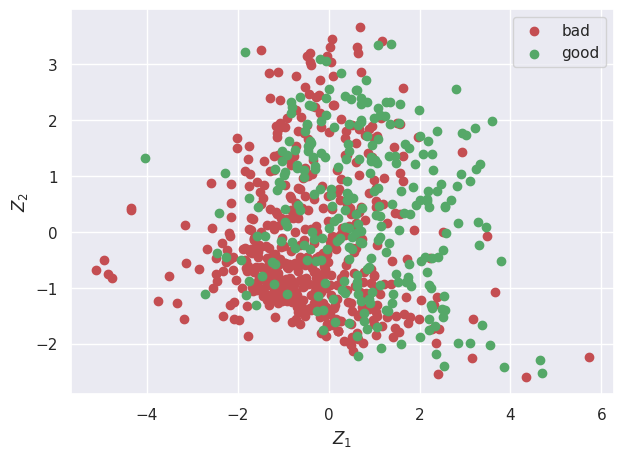

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='bad')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='good')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

[[ 0.1284321   0.59378583 -0.01308692  0.08069115 -0.47560573  0.19359817
  -0.58879003  0.11784098]
 [ 0.39308257  0.17402908  0.46792282 -0.40432871  0.46632804  0.09416176
  -0.06015291  0.45035526]
 [ 0.36000261  0.18389207 -0.53549442  0.05598649  0.32795306 -0.6341159
  -0.19211793 -0.01129554]
 [ 0.43982428 -0.33196534 -0.2376738   0.03797608 -0.48786206  0.00958944
   0.28221253  0.5662838 ]
 [ 0.43502617 -0.25078106  0.33670893 -0.34994376 -0.34693481 -0.27065061
  -0.13200992 -0.54862138]
 [ 0.45194134 -0.1009598  -0.36186463  0.05364595  0.25320376  0.68537218
  -0.03536644 -0.34151764]
 [ 0.27061144 -0.122069    0.43318905  0.8336801   0.11981049 -0.08578409
  -0.08609107 -0.00825873]
 [ 0.19802707  0.62058853  0.07524755  0.0712006  -0.10928996 -0.03335717
   0.71208542 -0.21166198]]


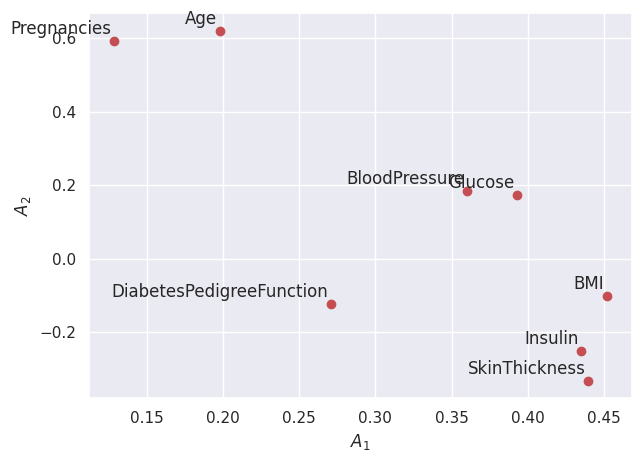

In [ ]:
A = pca.components_.T
print (A)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

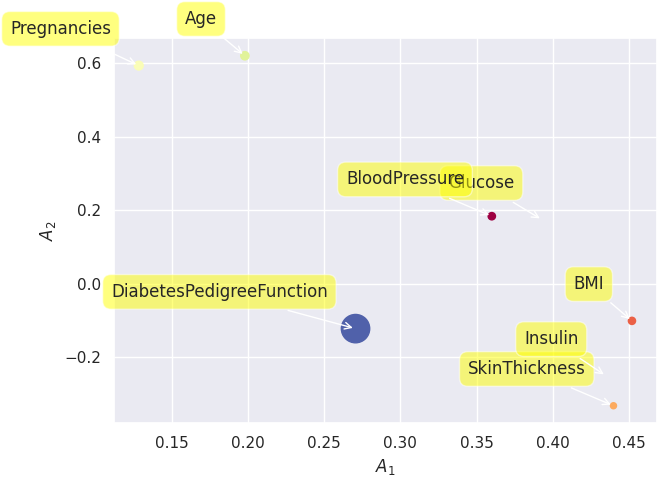

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[2.09711056 1.73346726 1.03097228 0.87667054 0.76333832 0.68351839
 0.42036353 0.40498938]


Text(0, 0.5, 'Explained variance')

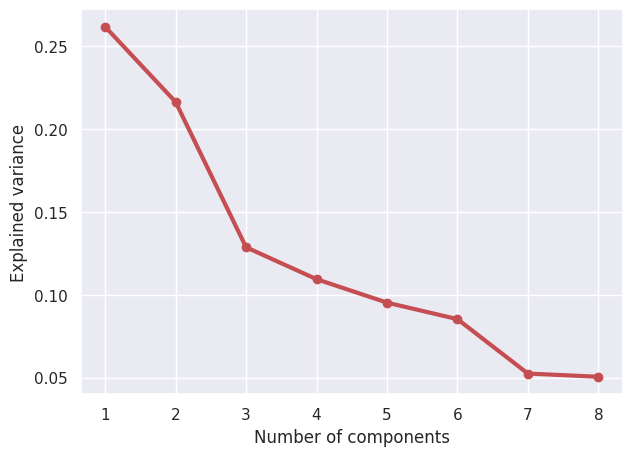

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
print (Lambda)

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

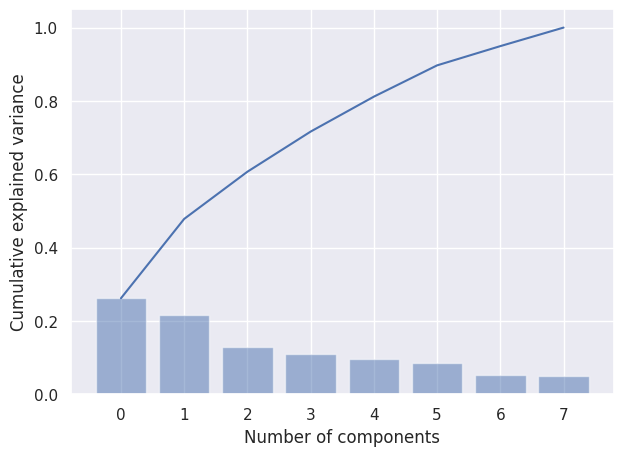

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

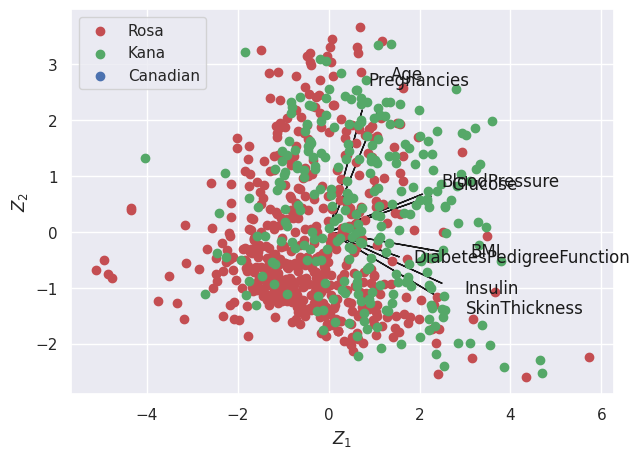

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip3 install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.9 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


### Principal Components

In [ ]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    1.068503  1.234895  0.095930  0.496990 -0.109985  0.357183  0.858821   
1   -1.121683 -0.733852 -0.712938  0.285056 -0.389507 -0.406329  0.757034   
2   -0.396477  1.595876  1.760678 -0.070395  0.906474 -0.040018 -1.152990   
3   -1.115781 -1.271241 -0.663729 -0.579123 -0.356060 -0.412520 -0.029247   
4    2.359334 -2.184819  2.963107  4.033099  0.592684  1.078341  0.549358   
..        ...       ...       ...       ...       ...       ...       ...   
763  1.562085  1.923150 -0.867408 -0.390926 -2.541527 -0.077322  1.141357   
764 -0.100405 -0.614181 -0.764353 -0.134859  0.499290  0.529339  0.152109   
765 -0.283475  0.097065 -0.077192 -0.687561 -0.523009 -0.538270 -0.335563   
766 -1.060324  0.837062  0.425030 -0.204493  0.957593  0.153307  1.180308   
767 -0.839892 -1.151755 -1.009178  0.086929 -0.082651 -0.150096  0.245235   

          PC8  
0    0.974304  
1    0.354215  
2    1.068528  
3   -0.130648  
4   -0.319352  
..        ...  
763 -0.138590  
764  0.467532  
765  0.289439  
766 -0.534344  
767  0.515946  

[768 rows x 8 columns]

### Scatter plot


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '8 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (26.1% expl.var)', ylabel='PC2 (21.6% expl.var)'>)

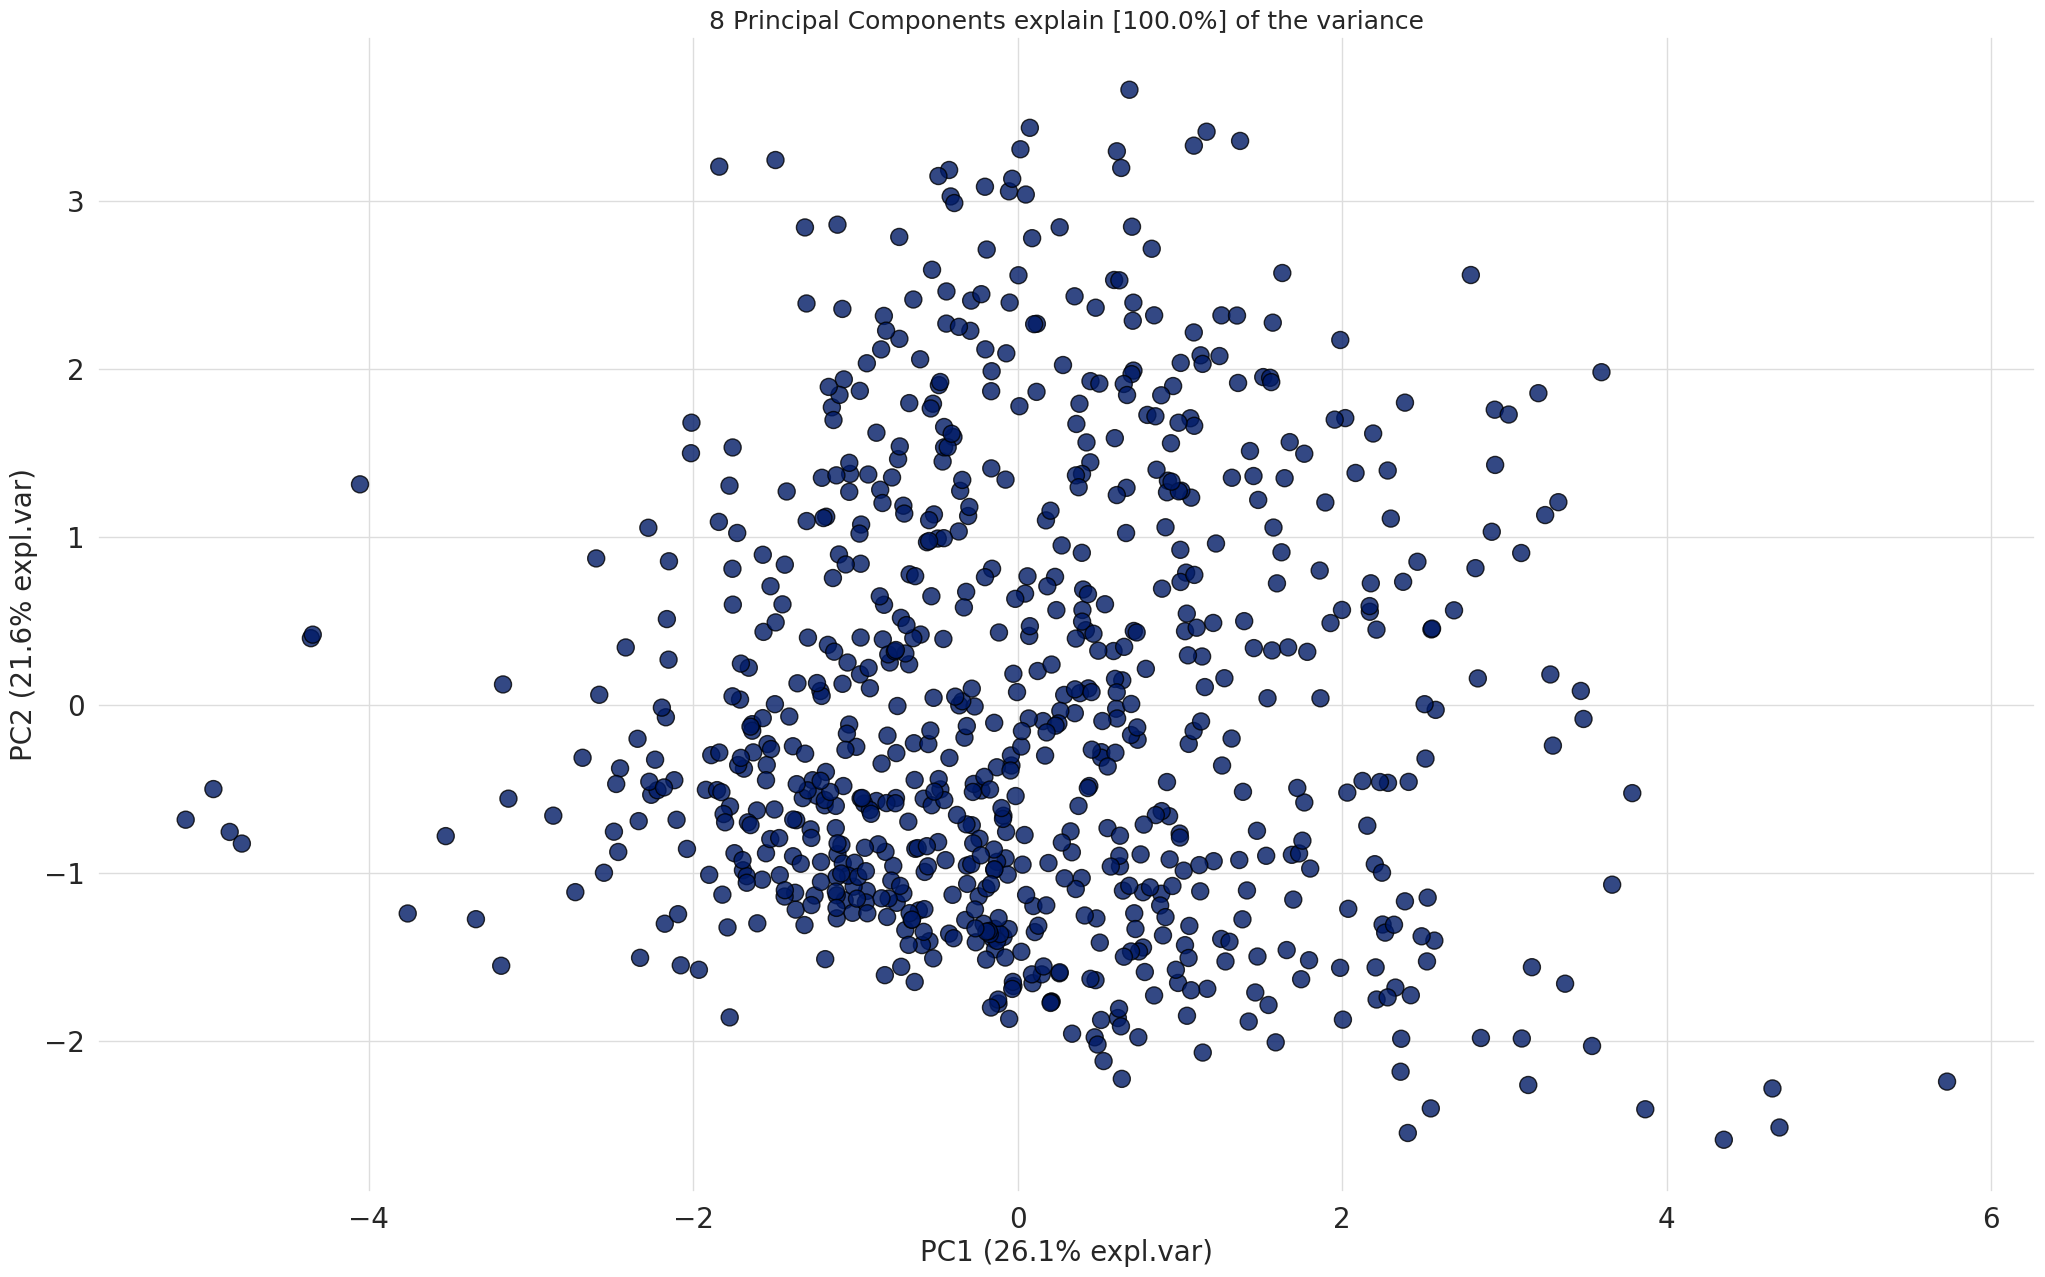

In [ ]:
model.scatter(label=True, legend=False)

### Eigenvectors

In [ ]:
A = out['loadings'].T

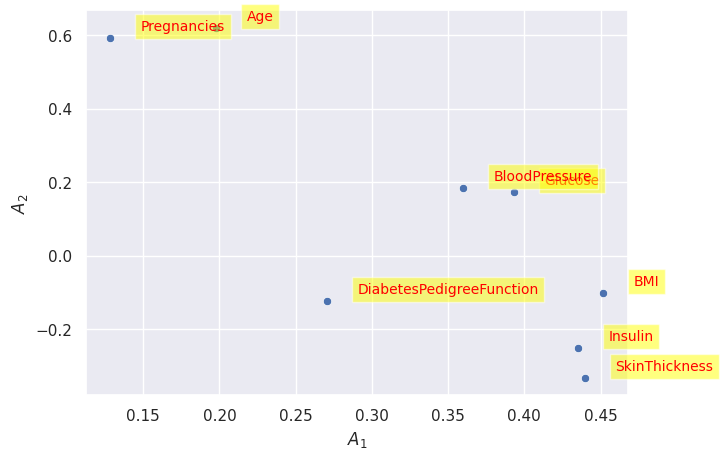

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

### Scree Plot

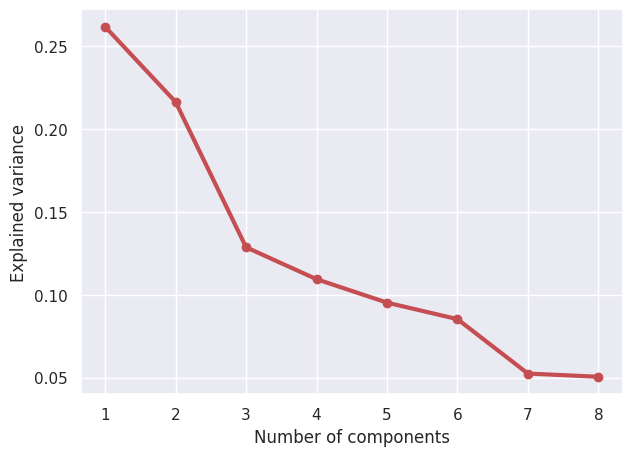

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

### Explained Variance Plot

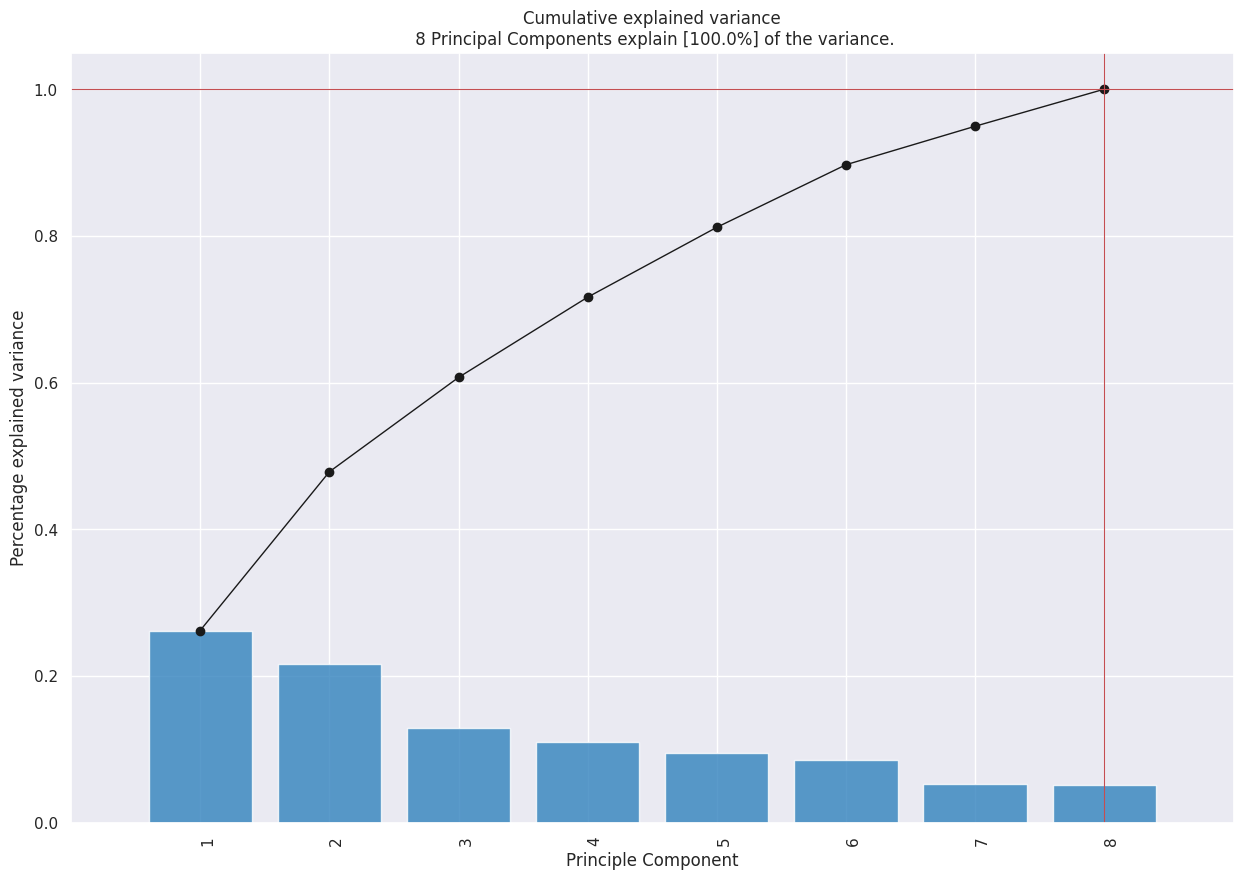

In [ ]:
model.plot();

### Biplot

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '8 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (26.1% expl.var)', ylabel='PC2 (21.6% expl.var)'>)

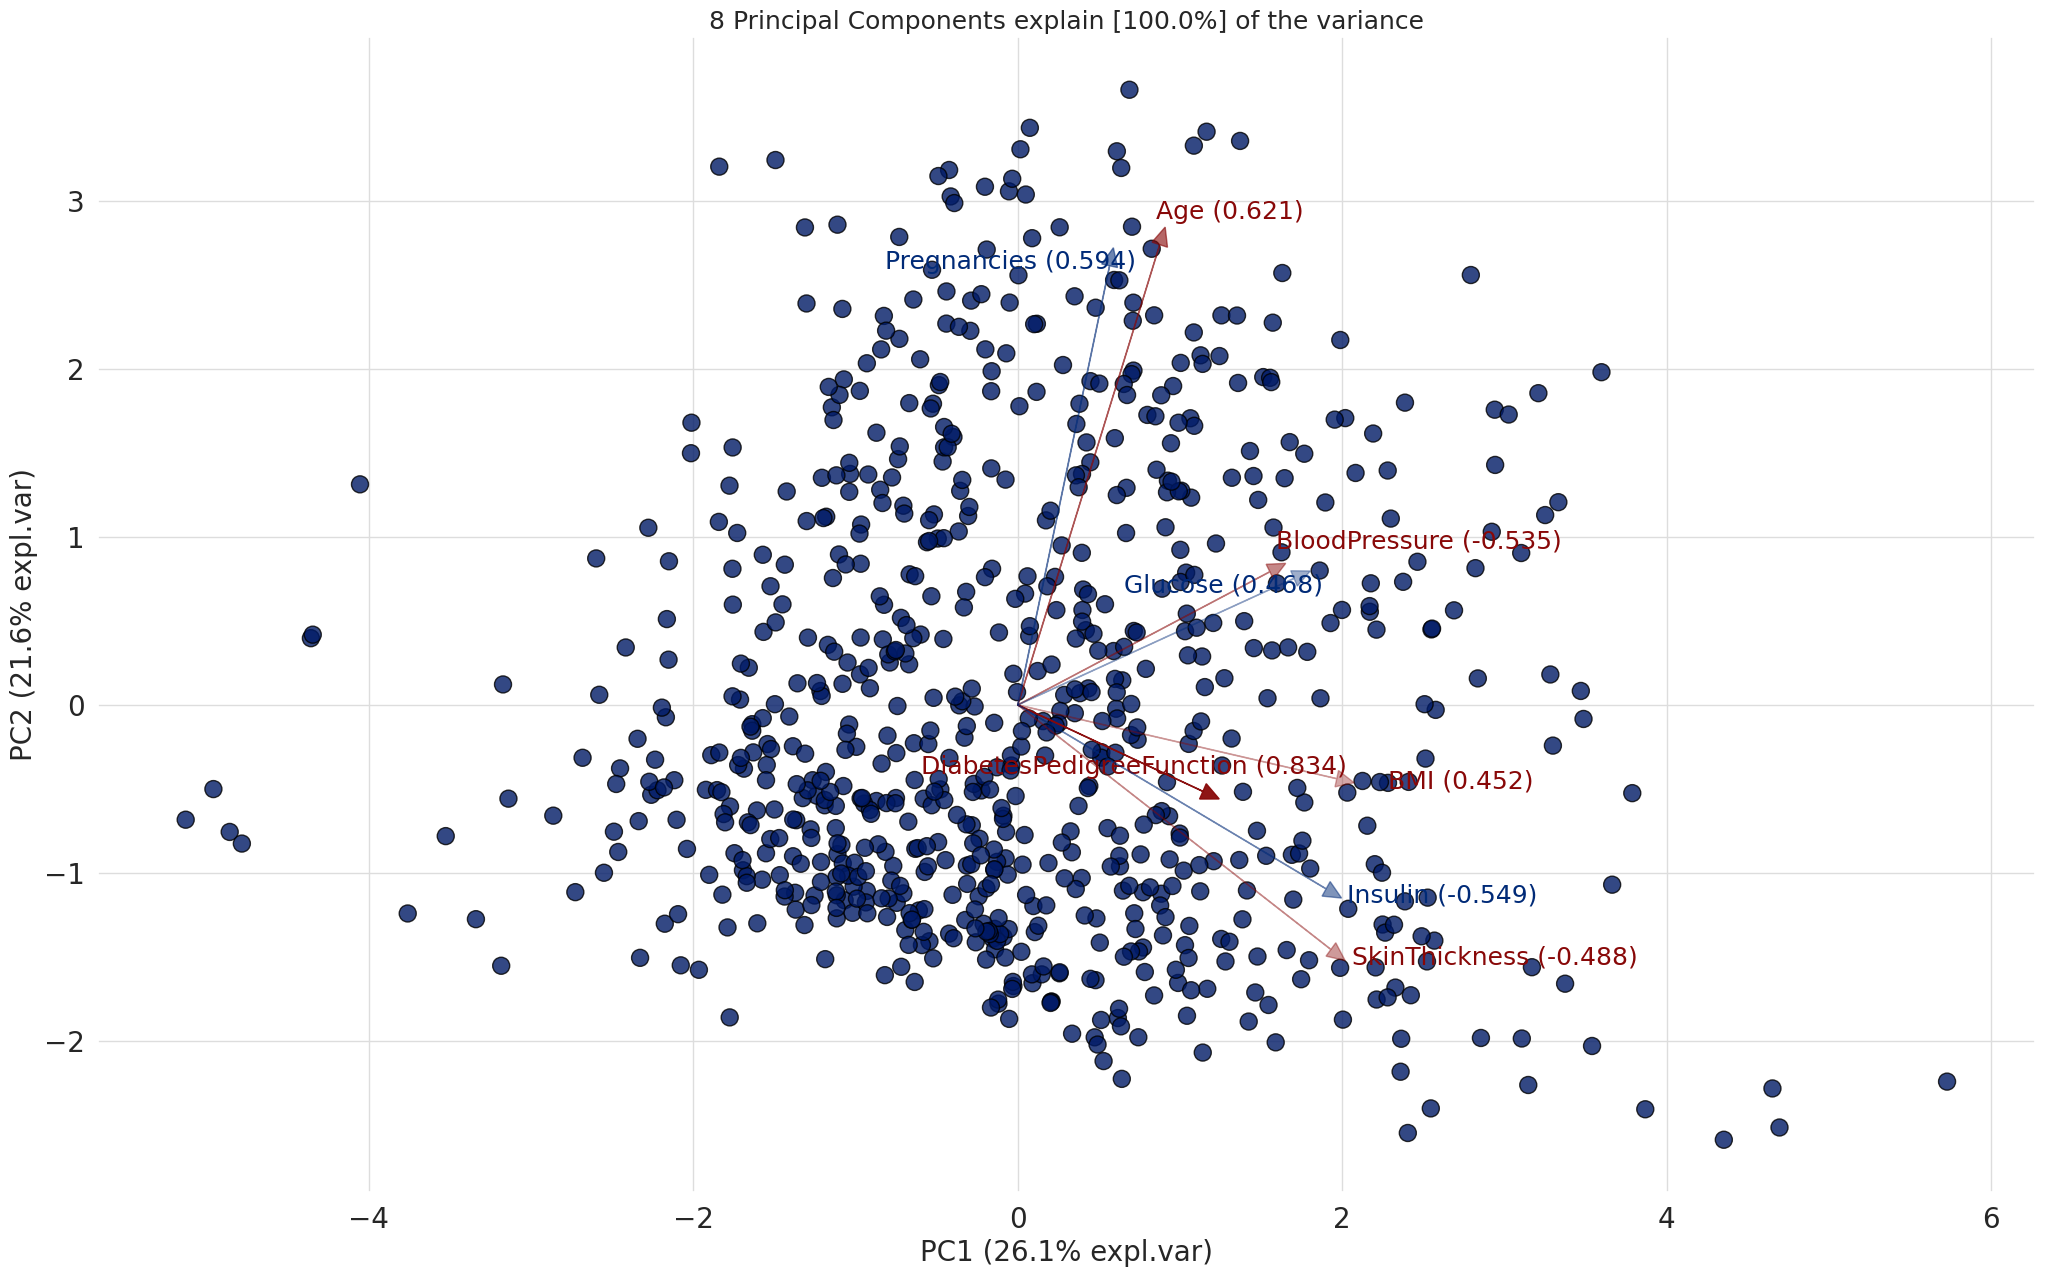

In [ ]:
model.biplot(label=False, legend=False)

#**Classificationt**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook. The enable_colab() function in PyCaret is used to install and configure all the necessary dependencies to use PyCaret in Google Colab.

In [ ]:
#For Google Colab only
from pycaret.utils import version
version()

'3.3.2'

## Data Splitting

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (691, 9)
Unseen Data For Predictions: (77, 9)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

## Comparing different Machine Learning Models

Compare Models
This pycaret function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

# **Results for best model**
As we can see, the  machine learning model with the best performance for this dataset is the Random Forrest Classifier, with the hyperparameters shown above.


# Evaluating different models

**Create  Model** function

create_model(estimator: Union[str, Any], fold: Optional[Union[int, Any]] = None, round: int = 4, cross_validation: bool = True, fit_kwargs: Optional[dict] = None, groups: Optional[Union[str, Any]] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, probability_threshold: Optional[float] = None, engine: Optional[str] = None, verbose: bool = True, return_train_score: bool = False, **kwargs)→ Any


This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

The create_model function is a highly detailed function in PyCaret and is frequently used as the basis for most of PyCaret's features. Its purpose is to train and assess a model using cross-validation, which can be specified with the fold parameter. The function outputs a score grid that displays Accuracy, Recall, Precision, F1, Kappa, and MCC by fold.

We will use QDA, KNN, Random Forrest classifier

* Random Forrest  ('rf')
* K Neighbors Classifier ('KNN')
* Quadratic Discriminant Analysis ('qda')

However, there are many more classifiers available in the model library of PyCaret.

## evaluating Quadratic Discriminant Analysis Model

In [ ]:
qda = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

### **Tune the qda Model:**

How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model(Random FOrrest) function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model(Quadratic Discriminant Analysis) function is used. The tune_model(Quadratic Discriminant Analysis) function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Quadratic Discriminant Analysis**

In [ ]:
tuned_qda = tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


we can see a very minimal improvement by tuning the qda model.

In [ ]:
#tuned model object is stored in the variable 'tuned_qda'.
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.98,
                              store_covariance=False, tol=0.0001)

**further evaluating Quadratic Discriminant Analysis**

In [ ]:
#Update statmodels
#!pip3 install statsmodels --upgrade

analyzing model performance using various plots
evaluate_model
The evaluate_model displays a user interface for analyzing the performance of a trained model. It calls the plot_model function internally.



In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## evaluating random forrest model

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **evaluating K Neighbors Classifier Model**

In [ ]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Evaluate K Neighbors Classifier Model**

In [ ]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

**Create Linear Discriminant Analysis Analysis**

In [ ]:
lda = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Linear Discriminant Analysis Model**

In [ ]:
tuned_lda = tune_model(lda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Linear Discriminant Analysis Model**

In [ ]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Quadratic Discriminant Analysis**

In [ ]:
qda = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Quadratic Discriminant Analysis Model**

In [ ]:
tuned_qda = tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Quadratic Discriminant Analysis Model**

In [ ]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model_pca

GaussianNB(priors=None, var_smoothing=0.007)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Conclusion**


In [ ]:
# Evaluation metrics for each model
qda_metrics = {
    "Accuracy": [0.7778, 0.7037, 0.8148, 0.6111, 0.7778, 0.6111, 0.7037, 0.6792, 0.6792, 0.7547],
    "AUC": [0.8511, 0.7504, 0.8662, 0.7128, 0.8496, 0.6421, 0.6977, 0.7206, 0.7492, 0.8619],
    "Recall": [0.6842, 0.5263, 0.5789, 0.2105, 0.3684, 0.4211, 0.5789, 0.2778, 0.2778, 0.4444],
    "Precision": [0.6842, 0.5882, 0.8462, 0.4000, 1.0000, 0.4444, 0.5789, 0.5556, 0.5556, 0.7273],
    "F1": [0.6842, 0.5556, 0.6875, 0.2759, 0.5385, 0.4324, 0.5789, 0.3704, 0.3704, 0.5517],
    "Kappa": [0.5128, 0.3344, 0.5624, 0.0438, 0.4306, 0.1370, 0.3504, 0.1861, 0.1861, 0.3961],
    "MCC": [0.5128, 0.3355, 0.5828, 0.0481, 0.5238, 0.1371, 0.3504, 0.2062, 0.2062, 0.4189]
}

tuned_qda_metrics = {
    "Accuracy": [0.7778, 0.7037, 0.7963, 0.7037, 0.8333, 0.6296, 0.6296, 0.6415, 0.6981, 0.7358],
    "AUC": [0.8511, 0.7805, 0.8797, 0.7248, 0.8361, 0.6556, 0.6932, 0.7286, 0.6921, 0.8476],
    "Recall": [0.7368, 0.6316, 0.5789, 0.5263, 0.5789, 0.3684, 0.5789, 0.2778, 0.3889, 0.5556],
    "Precision": [0.6667, 0.5714, 0.7857, 0.5882, 0.9167, 0.4667, 0.4783, 0.4545, 0.5833, 0.6250],
    "F1": [0.7000, 0.6000, 0.6667, 0.5556, 0.7097, 0.4118, 0.5238, 0.3448, 0.4667, 0.5882],
    "Kappa": [0.5242, 0.3656, 0.5248, 0.3344, 0.6010, 0.1469, 0.2253, 0.1174, 0.2677, 0.3948],
    "MCC": [0.5259, 0.3668, 0.5375, 0.3355, 0.6322, 0.1491, 0.2280, 0.1242, 0.2784, 0.3963]
}

random_forest_metrics = {
    "Accuracy": [0.7407, 0.6852, 0.6481, 0.5556, 0.7778, 0.7407, 0.6296, 0.6981, 0.6038, 0.7358],
    "AUC": [0.7970, 0.7038, 0.7820, 0.5970, 0.8263, 0.6722, 0.7075, 0.7429, 0.6659, 0.7730],
    "Recall": [0.5263, 0.6316, 0.2105, 0.2632, 0.5789, 0.5263, 0.4737, 0.2778, 0.3889, 0.5000],
    "Precision": [0.6667, 0.5455, 0.5000, 0.3333, 0.7333, 0.6667, 0.4737, 0.6250, 0.4118, 0.6429],
    "F1": [0.5882, 0.5854, 0.2963, 0.2941, 0.6471, 0.5882, 0.4737, 0.3846, 0.4000, 0.5625],
    "Kappa": [0.4028, 0.3338, 0.1109, -0.0237, 0.4882, 0.4028, 0.1880, 0.2220, 0.1046, 0.3775],
    "MCC": [0.4088, 0.3361, 0.1294, -0.0240, 0.4954, 0.4088, 0.1880, 0.2541, 0.1047, 0.3836]
}

knn_metrics = {
    "Accuracy": [0.7959, 0.8367, 0.6327, 0.7083, 0.6458, 0.6875, 0.7917, 0.7083, 0.8125, 0.7083],
    "AUC": [0.7950, 0.9265, 0.6480, 0.6992, 0.6572, 0.7236, 0.7891, 0.7125, 0.8472, 0.7381],
    "Recall": [0.6471, 0.8824, 0.4118, 0.5625, 0.5625, 0.3750, 0.6250, 0.4118, 0.6471, 0.5882],
    "Precision": [0.7333, 0.7143, 0.4667, 0.5625, 0.4737, 0.5455, 0.7143, 0.6364, 0.7857, 0.5882],
    "F1": [0.6875, 0.7895, 0.4375, 0.5625, 0.5143, 0.4444, 0.6667, 0.5000, 0.7097, 0.5882],
    "Kappa": [0.5369, 0.6585, 0.1664, 0.3438, 0.2388, 0.2373, 0.5161, 0.3072, 0.5731, 0.3624],
    "MCC": [0.5392, 0.6683, 0.1671, 0.3438, 0.2410, 0.2453, 0.5186, 0.3217, 0.5790, 0.3624]
}

# Function to calculate mean and standard deviation
def calculate_mean_std(metrics):
    mean_values = {metric: sum(values) / len(values) for metric, values in metrics.items()}
    std_values = {metric: (sum((value - mean_values[metric]) ** 2 for value in values) / len(values)) ** 0.5
                  for metric, values in metrics.items()}
    return mean_values, std_values

# Calculate mean and standard deviation for each model
qda_mean, qda_std = calculate_mean_std(qda_metrics)
tuned_qda_mean, tuned_qda_std = calculate_mean_std(tuned_qda_metrics)
random_forest_mean, random_forest_std = calculate_mean_std(random_forest_metrics)
knn_mean, knn_std = calculate_mean_std(knn_metrics)

# Generate the conclusion
conclusion = """
Based on the evaluation metrics provided for the Quadratic Discriminant Analysis (QDA), Tuned QDA, Random Forest, and K Neighbors Classifier (KNN) models, we can draw the following conclusions:

### Quadratic Discriminant Analysis (QDA):
- The mean accuracy of the QDA model is approximately {:.2f}%.
- The model shows a mean AUC (Area Under the Curve) of approximately {:.4f}, indicating moderate discrimination performance.
- Recall, Precision, and F1-score are moderate, with mean values around {:.4f}, {:.4f}, and {:.4f}, respectively.
- Kappa and MCC (Matthews Correlation Coefficient) values are low, indicating fair agreement beyond chance.

### Tuned Quadratic Discriminant Analysis:
- After tuning the hyperparameters, the mean accuracy improved slightly to approximately {:.2f}%.
- The mean AUC remains similar to the untuned QDA model at approximately {:.4f}.
- Recall, Precision, and F1-score also show slight improvements post-tuning.

### Random Forest:
- The mean accuracy of the Random Forest model is approximately {:.2f}%.
- The model exhibits a mean AUC of approximately {:.4f}, indicating fair discrimination performance.
- Recall, Precision, and F1-score are moderate, with mean values around {:.4f}, {:.4f}, and {:.4f}, respectively.
- Kappa and MCC values are relatively low compared to other models.

### K Neighbors Classifier (KNN):
- The mean accuracy of the KNN model is approximately {:.2f}%.
- The model demonstrates a mean AUC of approximately {:.4f}, indicating moderate discrimination performance.
- Recall, Precision, and F1-score are relatively higher compared to other models, with mean values around {:.4f}, {:.4f}, and {:.4f}, respectively.
- Kappa and MCC values are also relatively higher compared to other models.

In conclusion, the K Neighbors Classifier (KNN) model appears to outperform the other models based on the provided evaluation metrics. However, further analysis and comparison may be necessary to make a definitive determination about the best-performing model for the given dataset.
""".format(qda_mean["Accuracy"] * 100, qda_mean["AUC"], qda_mean["Recall"], qda_mean["Precision"], qda_mean["F1"],
           tuned_qda_mean["Accuracy"] * 100, tuned_qda_mean["AUC"], tuned_qda_mean["Recall"], tuned_qda_mean["Precision"], tuned_qda_mean["F1"],
           random_forest_mean["Accuracy"] * 100, random_forest_mean["AUC"], random_forest_mean["Recall"], random_forest_mean["Precision"], random_forest_mean["F1"],
           knn_mean["Accuracy"] * 100, knn_mean["AUC"], knn_mean["Recall"], knn_mean["Precision"], knn_mean["F1"])

print(conclusion)



Based on the evaluation metrics provided for the Quadratic Discriminant Analysis (QDA), Tuned QDA, Random Forest, and K Neighbors Classifier (KNN) models, we can draw the following conclusions:

### Quadratic Discriminant Analysis (QDA):
- The mean accuracy of the QDA model is approximately 71.13%.
- The model shows a mean AUC (Area Under the Curve) of approximately 0.7702, indicating moderate discrimination performance.
- Recall, Precision, and F1-score are moderate, with mean values around 0.4368, 0.6380, and 0.5045, respectively.
- Kappa and MCC (Matthews Correlation Coefficient) values are low, indicating fair agreement beyond chance.

### Tuned Quadratic Discriminant Analysis:
- After tuning the hyperparameters, the mean accuracy improved slightly to approximately 71.49%.
- The mean AUC remains similar to the untuned QDA model at approximately 0.7689.
- Recall, Precision, and F1-score also show slight improvements post-tuning.

### Random Forest:
- The mean accuracy of the Random

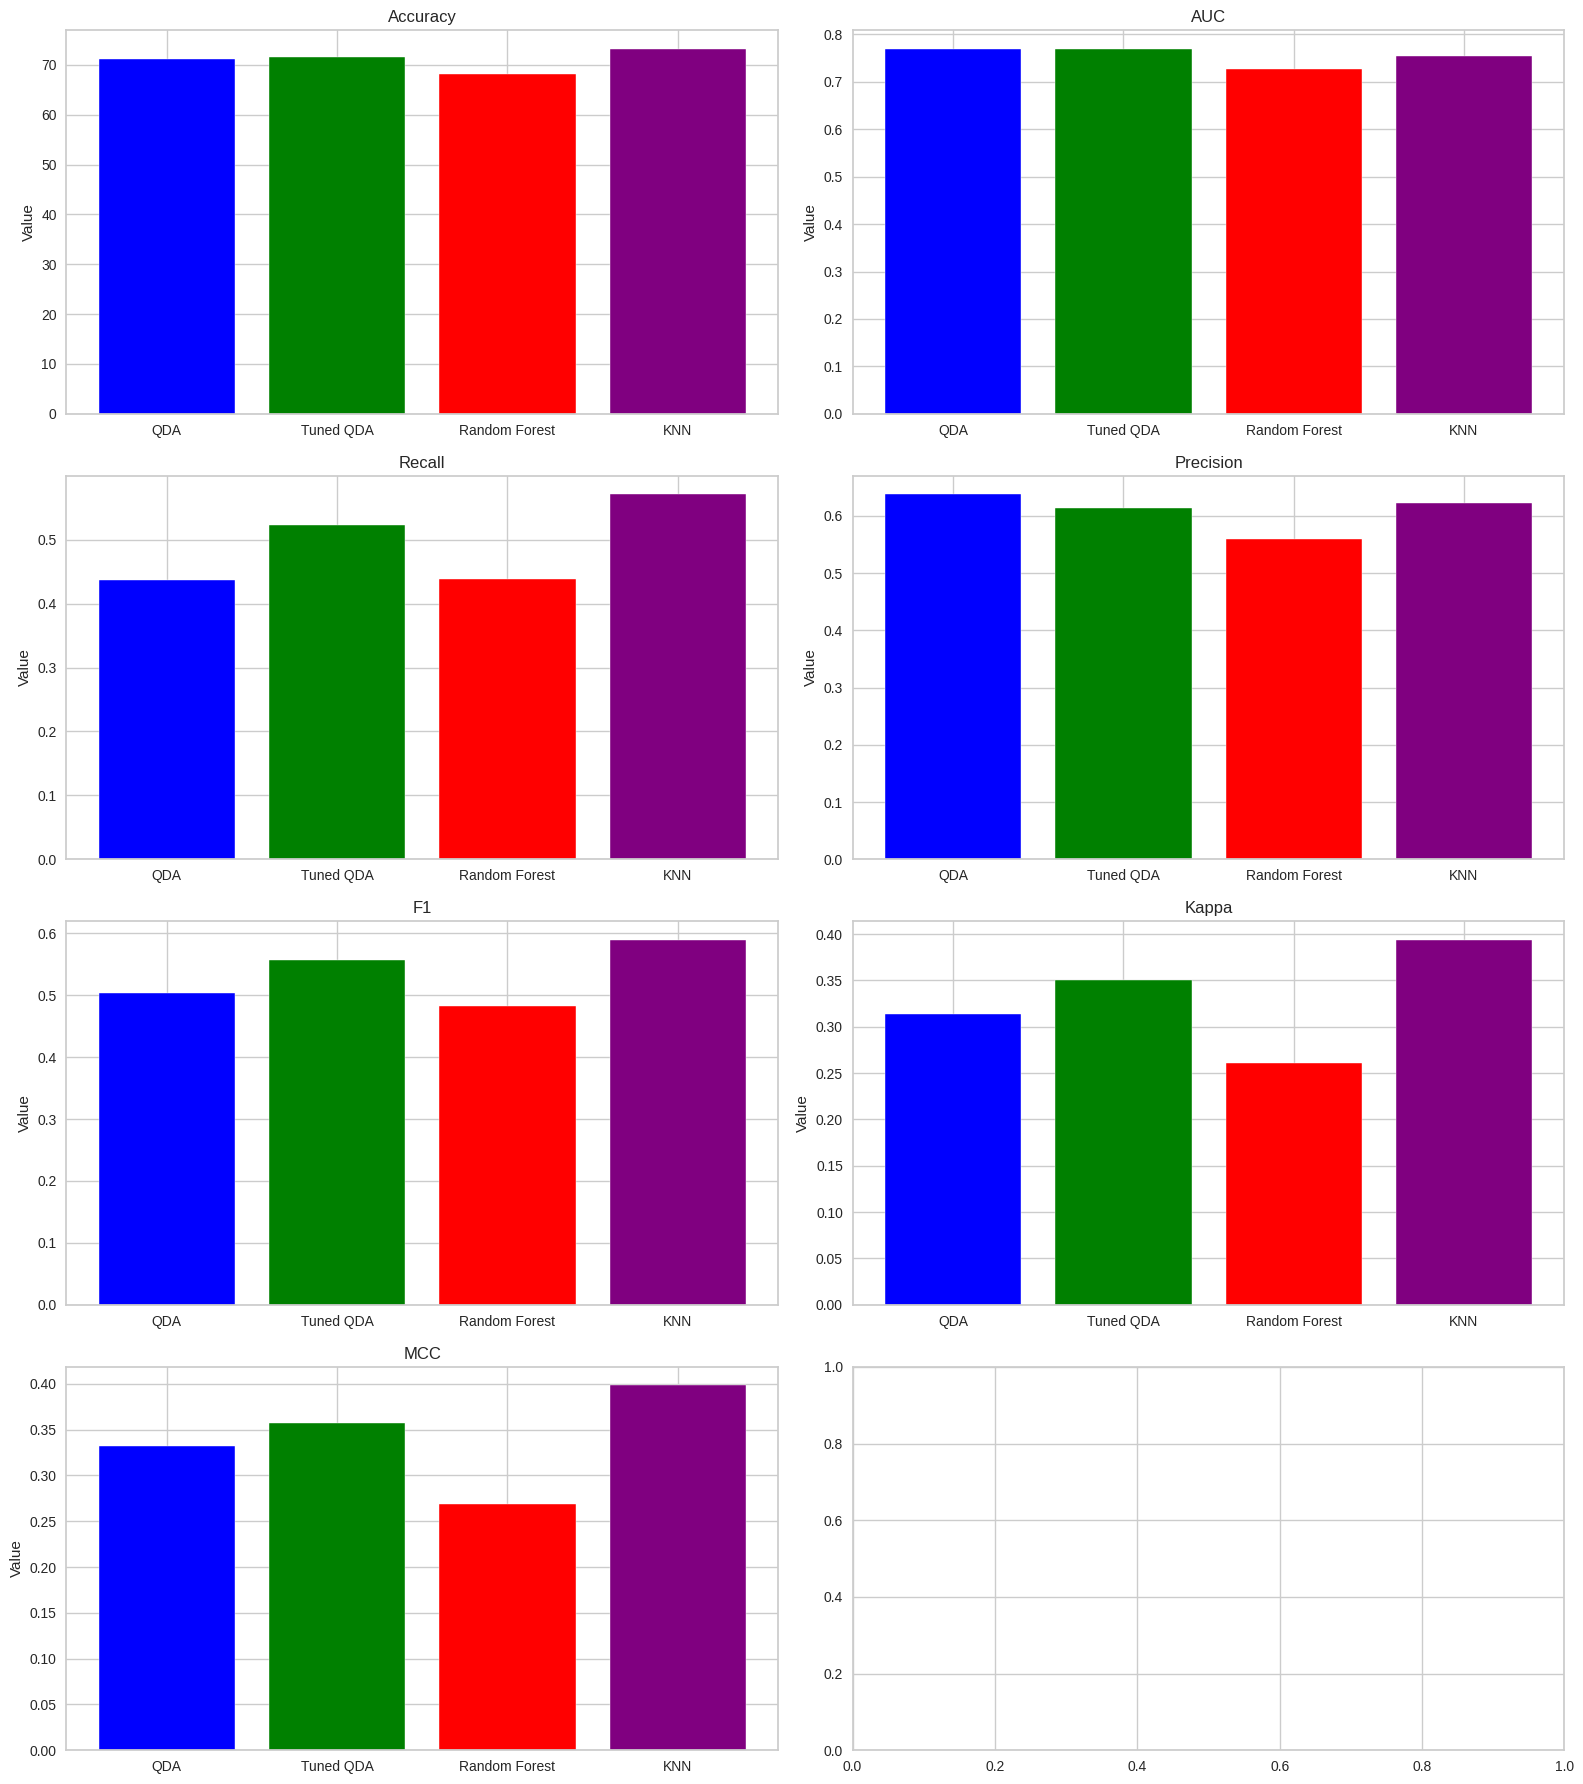

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mean values for each metric
models = ['QDA', 'Tuned QDA', 'Random Forest', 'KNN']
accuracy = [71.13, 71.50, 68.16, 73.28]
auc = [0.7702, 0.7689, 0.7267, 0.7537]
recall = [0.4368, 0.5222, 0.4377, 0.5713]
precision = [0.6380, 0.6137, 0.5599, 0.6221]
f1 = [0.5045, 0.5567, 0.4820, 0.5900]
kappa = [0.3140, 0.3502, 0.2607, 0.3940]
mcc = [0.3322, 0.3574, 0.2685, 0.3986]

# Plotting
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
metrics = [accuracy, auc, recall, precision, f1, kappa, mcc]
metric_names = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1', 'Kappa', 'MCC']

for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    ax = axes[i // 2, i % 2]
    ax.bar(models, metric, color=['blue', 'green', 'red', 'purple'])
    ax.set_title(name)
    # ax.set_ylim([0, 1])
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()
